In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tweetsanalyzer/processed_tweetsz.csv


In [2]:
data=pd.read_csv('../input/tweetsanalyzer/processed_tweetsz.csv')

In [3]:
data.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,screen_name,followers_count,friends_count,hashtags,user_mentions,place,possibly_sensitive
0,Fri Jun 18 17:55:49 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...","RT @TelGlobalHealth: 🚨Africa is ""in the midst ...",0.000000e+00,0.000000,en,548.0,612.0,❤️‍🔥,ketuesriche,551,351,[],"[{'screen_name': 'TelGlobalHealth', 'name': 'T...",Mass,None
1,Fri Jun 18 17:55:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @globalhlthtwit: Dr Moeti is head of WHO in...,1.333333e-01,0.455556,en,195.0,92.0,Gordon Russell,Grid1949,66,92,[],"[{'screen_name': 'globalhlthtwit', 'name': 'An...","Edinburgh, Scotland",None
2,Fri Jun 18 17:56:20 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @PeterHotez: I think it’s important that we...,3.000000e-01,0.766667,en,72.0,20.0,Ash Paul,pash22,28250,30819,[],"[{'screen_name': 'PeterHotez', 'name': 'Prof P...",United Kingdom,None
3,Fri Jun 18 17:56:25 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @CDCDirector: I’m pleased to welcome the #W...,6.444444e-01,0.911111,en,683.0,220.0,Sandhra Lee,SandhraLee,759,4163,"[{'text': 'WeCanDoThis', 'indices': [44, 56]},...","[{'screen_name': 'CDCDirector', 'name': 'Roche...",USA,None
4,Fri Jun 18 17:56:46 +0000 2021,"<a href=""http://twitter.com/#!/download/ipad"" ...",RT @RealJoelSmalley: Yet another amazingly qua...,5.551115e-17,0.900000,en,536.0,348.0,Lili Delamotte,Candide62,154,1102,[],"[{'screen_name': 'RealJoelSmalley', 'name': 'J...","Nord-Pas-de-Calais, France",None


In [22]:
class DataReading:
    
    """
    Module to load data 
    
    """
    
    def dataRead(df):
        data=pd.read_csv(df)
        
        return data
    
class  dataCleaning:
    
    """
    This module is focused on data cleaning steps
    
    
    """
    
    def dropNullCols(df):
        
        df.dropna(inplace=True)
        
        return df
    
    def dropSpecificCols(df,cols):
        df.dropna(labels=[cols],inpalce=True,axis=1)
        
        return df
    
    def stripTweets(df,cols):
        df[cols]=df[cols].apply(lambda x: x.strip(":")[1])
        
    def fixDateTime(df,cols):
        df[cols]=pd.to_datetime(df[cols])
        
    
    
    
class dataFE:
    
    def text_category(pval):
          if pval==0:
            return "neutral"
          elif pval>0:
            return "positive"
          else:
            return "negative"
      

        
        
        
    def hourofDay(df,cols):
        df['hour']=pd.DatetimeIndex(df[cols]).hour
    def dayofYear(df,cols):
        df['day']=pd.DatetimeIndex(df[cols]).day
    def stripText(df,cols):
        df[cols]=df[cols].apply(lambda x: x.lower())
        df[cols]=df[cols].apply(lambda x: x.replace('#',''))
        df[cols]=df[cols].apply(lambda x: x.replace('"',''))

class dataViz:
    def countPlots(df,cols):
        df[cols].value_counts().plot(kind='bar')
        
    def freqWords(df,cols):
        import matplotlib.pyplot as plt
        from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
        plt.figure(figsize=(20, 10))
        plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(df[cols].values)))
        plt.axis('off')
        plt.title('Most Frequent Words In Our Tweets',fontsize=16)
        plt.show()
    
        


In [6]:
data=DataReading.dataRead('../input/tweetsanalyzer/processed_tweetsz.csv')

In [7]:
data

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,screen_name,followers_count,friends_count,hashtags,user_mentions,place,possibly_sensitive
0,Fri Jun 18 17:55:49 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...","RT @TelGlobalHealth: 🚨Africa is ""in the midst ...",0.000000e+00,0.000000,en,548.0,612.0,❤️‍🔥,ketuesriche,551,351,[],"[{'screen_name': 'TelGlobalHealth', 'name': 'T...",Mass,None
1,Fri Jun 18 17:55:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @globalhlthtwit: Dr Moeti is head of WHO in...,1.333333e-01,0.455556,en,195.0,92.0,Gordon Russell,Grid1949,66,92,[],"[{'screen_name': 'globalhlthtwit', 'name': 'An...","Edinburgh, Scotland",None
2,Fri Jun 18 17:56:20 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @PeterHotez: I think it’s important that we...,3.000000e-01,0.766667,en,72.0,20.0,Ash Paul,pash22,28250,30819,[],"[{'screen_name': 'PeterHotez', 'name': 'Prof P...",United Kingdom,None
3,Fri Jun 18 17:56:25 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @CDCDirector: I’m pleased to welcome the #W...,6.444444e-01,0.911111,en,683.0,220.0,Sandhra Lee,SandhraLee,759,4163,"[{'text': 'WeCanDoThis', 'indices': [44, 56]},...","[{'screen_name': 'CDCDirector', 'name': 'Roche...",USA,None
4,Fri Jun 18 17:56:46 +0000 2021,"<a href=""http://twitter.com/#!/download/ipad"" ...",RT @RealJoelSmalley: Yet another amazingly qua...,5.551115e-17,0.900000,en,536.0,348.0,Lili Delamotte,Candide62,154,1102,[],"[{'screen_name': 'RealJoelSmalley', 'name': 'J...","Nord-Pas-de-Calais, France",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,Sat Jun 19 07:40:53 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",RT @Givenkazeni: Zweli please just release the...,0.000000e+00,0.400000,en,188.0,53.0,N. Simelane🇿🇦,just_nomz_,596,517,[],"[{'screen_name': 'Givenkazeni', 'name': 'le’Gi...","Johannesburg, South Africa",None
3188,Sat Jun 19 07:41:00 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @N_RamchanderRao: Covid19 vaccines reach th...,0.000000e+00,0.000000,en,113.0,87.0,bitu,bitu_50,410,483,[],"[{'screen_name': 'N_RamchanderRao', 'name': 'N...","Jehanabad, India",None
3189,Sat Jun 19 07:41:09 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @shawajason: Liars. You tried to load off y...,0.000000e+00,0.000000,en,901.0,920.0,🇵🇸🇵🇸 Edward Said Knock You Out 🇵🇸🇵🇸,redhero,160,332,[],"[{'screen_name': 'shawajason', 'name': 'J. Sha...",🍣🥋💴🎏⛩🗼🍡🐙,False
3190,Sat Jun 19 07:41:26 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",RT @HighWireTalk: Former Pfizer VP and Virolog...,1.666667e-01,0.166667,en,1595.0,908.0,Waynego Tango,wayno_af007,2224,2739,[],"[{'screen_name': 'HighWireTalk', 'name': 'The ...","The boro, MA",None


In [ ]:
t=data['original_text'].str.split(":")[0][1]

In [8]:
data['original_text']=data['original_text'].apply( lambda x: x.split(":")[1])

In [9]:
data

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,screen_name,followers_count,friends_count,hashtags,user_mentions,place,possibly_sensitive
0,Fri Jun 18 17:55:49 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown thir...",0.000000e+00,0.000000,en,548.0,612.0,❤️‍🔥,ketuesriche,551,351,[],"[{'screen_name': 'TelGlobalHealth', 'name': 'T...",Mass,None
1,Fri Jun 18 17:55:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of...",1.333333e-01,0.455556,en,195.0,92.0,Gordon Russell,Grid1949,66,92,[],"[{'screen_name': 'globalhlthtwit', 'name': 'An...","Edinburgh, Scotland",None
2,Fri Jun 18 17:56:20 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COV...,3.000000e-01,0.766667,en,72.0,20.0,Ash Paul,pash22,28250,30819,[],"[{'screen_name': 'PeterHotez', 'name': 'Prof P...",United Kingdom,None
3,Fri Jun 18 17:56:25 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",I’m pleased to welcome the #WeCanDoThis bus t...,6.444444e-01,0.911111,en,683.0,220.0,Sandhra Lee,SandhraLee,759,4163,"[{'text': 'WeCanDoThis', 'indices': [44, 56]},...","[{'screen_name': 'CDCDirector', 'name': 'Roche...",USA,None
4,Fri Jun 18 17:56:46 +0000 2021,"<a href=""http://twitter.com/#!/download/ipad"" ...",Yet another amazingly qualified and courageou...,5.551115e-17,0.900000,en,536.0,348.0,Lili Delamotte,Candide62,154,1102,[],"[{'screen_name': 'RealJoelSmalley', 'name': 'J...","Nord-Pas-de-Calais, France",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,Sat Jun 19 07:40:53 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Zweli please just release the graphic designe...,0.000000e+00,0.400000,en,188.0,53.0,N. Simelane🇿🇦,just_nomz_,596,517,[],"[{'screen_name': 'Givenkazeni', 'name': 'le’Gi...","Johannesburg, South Africa",None
3188,Sat Jun 19 07:41:00 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Covid19 vaccines reach the remotest places of...,0.000000e+00,0.000000,en,113.0,87.0,bitu,bitu_50,410,483,[],"[{'screen_name': 'N_RamchanderRao', 'name': 'N...","Jehanabad, India",None
3189,Sat Jun 19 07:41:09 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Liars. You tried to load off your expired vac...,0.000000e+00,0.000000,en,901.0,920.0,🇵🇸🇵🇸 Edward Said Knock You Out 🇵🇸🇵🇸,redhero,160,332,[],"[{'screen_name': 'shawajason', 'name': 'J. Sha...",🍣🥋💴🎏⛩🗼🍡🐙,False
3190,Sat Jun 19 07:41:26 +0000 2021,"<a href=""http://twitter.com/download/android"" ...","Former Pfizer VP and Virologist, Dr. Michael ...",1.666667e-01,0.166667,en,1595.0,908.0,Waynego Tango,wayno_af007,2224,2739,[],"[{'screen_name': 'HighWireTalk', 'name': 'The ...","The boro, MA",None


In [11]:
# for user in data['user_mentions']:
#     print(user['name'])
    
data['user_mentions']=data['user_mentions'].apply(lambda x:x.split(",")[1].split(":")[1])

data['user_mentions']=data['user_mentions'].apply(lambda x:x.strip("''"))
data


,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,screen_name,followers_count,friends_count,hashtags,user_mentions,place,possibly_sensitive
0,Fri Jun 18 17:55:49 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown thir...",0.000000e+00,0.000000,en,548.0,612.0,❤️‍🔥,ketuesriche,551,351,[],'Telegraph Global Health Security,Mass,None
1,Fri Jun 18 17:55:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of...",1.333333e-01,0.455556,en,195.0,92.0,Gordon Russell,Grid1949,66,92,[],'Anthony Costello,"Edinburgh, Scotland",None
2,Fri Jun 18 17:56:20 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COV...,3.000000e-01,0.766667,en,72.0,20.0,Ash Paul,pash22,28250,30819,[],'Prof Peter Hotez MD PhD,United Kingdom,None
3,Fri Jun 18 17:56:25 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",I’m pleased to welcome the #WeCanDoThis bus t...,6.444444e-01,0.911111,en,683.0,220.0,Sandhra Lee,SandhraLee,759,4163,"[{'text': 'WeCanDoThis', 'indices': [44, 56]},...",'Rochelle Walensky,USA,None
4,Fri Jun 18 17:56:46 +0000 2021,"<a href=""http://twitter.com/#!/download/ipad"" ...",Yet another amazingly qualified and courageou...,5.551115e-17,0.900000,en,536.0,348.0,Lili Delamotte,Candide62,154,1102,[],'Joel Smalley 🌸,"Nord-Pas-de-Calais, France",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,Sat Jun 19 07:40:53 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Zweli please just release the graphic designe...,0.000000e+00,0.400000,en,188.0,53.0,N. Simelane🇿🇦,just_nomz_,596,517,[],'le’Giza,"Johannesburg, South Africa",None
3188,Sat Jun 19 07:41:00 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",Covid19 vaccines reach the remotest places of...,0.000000e+00,0.000000,en,113.0,87.0,bitu,bitu_50,410,483,[],'N Ramchander Rao,"Jehanabad, India",None
3189,Sat Jun 19 07:41:09 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Liars. You tried to load off your expired vac...,0.000000e+00,0.000000,en,901.0,920.0,🇵🇸🇵🇸 Edward Said Knock You Out 🇵🇸🇵🇸,redhero,160,332,[],'J. Shawa جاسم الشوا,🍣🥋💴🎏⛩🗼🍡🐙,False
3190,Sat Jun 19 07:41:26 +0000 2021,"<a href=""http://twitter.com/download/android"" ...","Former Pfizer VP and Virologist, Dr. Michael ...",1.666667e-01,0.166667,en,1595.0,908.0,Waynego Tango,wayno_af007,2224,2739,[],'The HighWire,"The boro, MA",None


In [49]:
import re
def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall("('[A-Za-z]+[A-Za-z0-9-_]+')", tweet)

In [73]:
def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall("('[A-Za-z]+[A-Za-z0-9-_]+',)", tweet)

In [79]:
r=data['hashtags'].apply(find_hashtags)
r
# data['hashtags'][3].strip("[]")
# data['hashtags'][3].split("}"
    

0                                 []
1                                 []
2                                 []
3       ['WeCanDoThis',, 'COVID19',]
4                                 []
                    ...             
3187                              []
3188                              []
3189                              []
3190                              []
3191                    ['COVID19',]
Name: hashtags, Length: 3192, dtype: object

In [67]:
removeWord=['text','indices']
pat=r'\b(?:{})\b'.format('|'.join(removeWord))

In [60]:
pat

'\\b(?:text|indices)\\b'

In [72]:
for i in r:
    i.strip(",")
r

AttributeError: 'list' object has no attribute 'strip'

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          3192 non-null   object 
 1   source              3192 non-null   object 
 2   original_text       3192 non-null   object 
 3   polarity            3192 non-null   float64
 4   subjectivity        3192 non-null   float64
 5   lang                3192 non-null   object 
 6   favorite_count      3192 non-null   float64
 7   retweet_count       3192 non-null   float64
 8   original_author     3192 non-null   object 
 9   screen_name         3192 non-null   object 
 10  followers_count     3192 non-null   int64  
 11  friends_count       3192 non-null   int64  
 12  hashtags            3192 non-null   object 
 13  user_mentions       3192 non-null   object 
 14  place               3192 non-null   object 
 15  possibly_sensitive  3192 non-null   object 
dtypes: flo

In [13]:
data['created_at']=pd.to_datetime(data['created_at'])

In [14]:
data

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,screen_name,followers_count,friends_count,hashtags,user_mentions,place,possibly_sensitive
0,2021-06-18 17:55:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown thir...",0.000000e+00,0.000000,en,548.0,612.0,❤️‍🔥,ketuesriche,551,351,[],'Telegraph Global Health Security,Mass,None
1,2021-06-18 17:55:59+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of...",1.333333e-01,0.455556,en,195.0,92.0,Gordon Russell,Grid1949,66,92,[],'Anthony Costello,"Edinburgh, Scotland",None
2,2021-06-18 17:56:20+00:00,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COV...,3.000000e-01,0.766667,en,72.0,20.0,Ash Paul,pash22,28250,30819,[],'Prof Peter Hotez MD PhD,United Kingdom,None
3,2021-06-18 17:56:25+00:00,"<a href=""http://twitter.com/download/android"" ...",I’m pleased to welcome the #WeCanDoThis bus t...,6.444444e-01,0.911111,en,683.0,220.0,Sandhra Lee,SandhraLee,759,4163,"[{'text': 'WeCanDoThis', 'indices': [44, 56]},...",'Rochelle Walensky,USA,None
4,2021-06-18 17:56:46+00:00,"<a href=""http://twitter.com/#!/download/ipad"" ...",Yet another amazingly qualified and courageou...,5.551115e-17,0.900000,en,536.0,348.0,Lili Delamotte,Candide62,154,1102,[],'Joel Smalley 🌸,"Nord-Pas-de-Calais, France",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,2021-06-19 07:40:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Zweli please just release the graphic designe...,0.000000e+00,0.400000,en,188.0,53.0,N. Simelane🇿🇦,just_nomz_,596,517,[],'le’Giza,"Johannesburg, South Africa",None
3188,2021-06-19 07:41:00+00:00,"<a href=""http://twitter.com/download/android"" ...",Covid19 vaccines reach the remotest places of...,0.000000e+00,0.000000,en,113.0,87.0,bitu,bitu_50,410,483,[],'N Ramchander Rao,"Jehanabad, India",None
3189,2021-06-19 07:41:09+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Liars. You tried to load off your expired vac...,0.000000e+00,0.000000,en,901.0,920.0,🇵🇸🇵🇸 Edward Said Knock You Out 🇵🇸🇵🇸,redhero,160,332,[],'J. Shawa جاسم الشوا,🍣🥋💴🎏⛩🗼🍡🐙,False
3190,2021-06-19 07:41:26+00:00,"<a href=""http://twitter.com/download/android"" ...","Former Pfizer VP and Virologist, Dr. Michael ...",1.666667e-01,0.166667,en,1595.0,908.0,Waynego Tango,wayno_af007,2224,2739,[],'The HighWire,"The boro, MA",None


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          3192 non-null   datetime64[ns, UTC]
 1   source              3192 non-null   object             
 2   original_text       3192 non-null   object             
 3   polarity            3192 non-null   float64            
 4   subjectivity        3192 non-null   float64            
 5   lang                3192 non-null   object             
 6   favorite_count      3192 non-null   float64            
 7   retweet_count       3192 non-null   float64            
 8   original_author     3192 non-null   object             
 9   screen_name         3192 non-null   object             
 10  followers_count     3192 non-null   int64              
 11  friends_count       3192 non-null   int64              
 12  hashtags            3192 non-null 

In [20]:
data['score']=data['polarity'].apply(dataFE.text_category)

In [21]:
data

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,screen_name,followers_count,friends_count,hashtags,user_mentions,place,possibly_sensitive,score
0,2021-06-18 17:55:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown thir...",0.000000e+00,0.000000,en,548.0,612.0,❤️‍🔥,ketuesriche,551,351,[],'Telegraph Global Health Security,Mass,None,neutral
1,2021-06-18 17:55:59+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of...",1.333333e-01,0.455556,en,195.0,92.0,Gordon Russell,Grid1949,66,92,[],'Anthony Costello,"Edinburgh, Scotland",None,positive
2,2021-06-18 17:56:20+00:00,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COV...,3.000000e-01,0.766667,en,72.0,20.0,Ash Paul,pash22,28250,30819,[],'Prof Peter Hotez MD PhD,United Kingdom,None,positive
3,2021-06-18 17:56:25+00:00,"<a href=""http://twitter.com/download/android"" ...",I’m pleased to welcome the #WeCanDoThis bus t...,6.444444e-01,0.911111,en,683.0,220.0,Sandhra Lee,SandhraLee,759,4163,"[{'text': 'WeCanDoThis', 'indices': [44, 56]},...",'Rochelle Walensky,USA,None,positive
4,2021-06-18 17:56:46+00:00,"<a href=""http://twitter.com/#!/download/ipad"" ...",Yet another amazingly qualified and courageou...,5.551115e-17,0.900000,en,536.0,348.0,Lili Delamotte,Candide62,154,1102,[],'Joel Smalley 🌸,"Nord-Pas-de-Calais, France",None,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,2021-06-19 07:40:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Zweli please just release the graphic designe...,0.000000e+00,0.400000,en,188.0,53.0,N. Simelane🇿🇦,just_nomz_,596,517,[],'le’Giza,"Johannesburg, South Africa",None,neutral
3188,2021-06-19 07:41:00+00:00,"<a href=""http://twitter.com/download/android"" ...",Covid19 vaccines reach the remotest places of...,0.000000e+00,0.000000,en,113.0,87.0,bitu,bitu_50,410,483,[],'N Ramchander Rao,"Jehanabad, India",None,neutral
3189,2021-06-19 07:41:09+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Liars. You tried to load off your expired vac...,0.000000e+00,0.000000,en,901.0,920.0,🇵🇸🇵🇸 Edward Said Knock You Out 🇵🇸🇵🇸,redhero,160,332,[],'J. Shawa جاسم الشوا,🍣🥋💴🎏⛩🗼🍡🐙,False,neutral
3190,2021-06-19 07:41:26+00:00,"<a href=""http://twitter.com/download/android"" ...","Former Pfizer VP and Virologist, Dr. Michael ...",1.666667e-01,0.166667,en,1595.0,908.0,Waynego Tango,wayno_af007,2224,2739,[],'The HighWire,"The boro, MA",None,positive


In [23]:
dataFE.hourofDay(data,'created_at')

In [24]:
data

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,screen_name,followers_count,friends_count,hashtags,user_mentions,place,possibly_sensitive,score,hour
0,2021-06-18 17:55:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown thir...",0.000000e+00,0.000000,en,548.0,612.0,❤️‍🔥,ketuesriche,551,351,[],'Telegraph Global Health Security,Mass,None,neutral,17
1,2021-06-18 17:55:59+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of...",1.333333e-01,0.455556,en,195.0,92.0,Gordon Russell,Grid1949,66,92,[],'Anthony Costello,"Edinburgh, Scotland",None,positive,17
2,2021-06-18 17:56:20+00:00,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COV...,3.000000e-01,0.766667,en,72.0,20.0,Ash Paul,pash22,28250,30819,[],'Prof Peter Hotez MD PhD,United Kingdom,None,positive,17
3,2021-06-18 17:56:25+00:00,"<a href=""http://twitter.com/download/android"" ...",I’m pleased to welcome the #WeCanDoThis bus t...,6.444444e-01,0.911111,en,683.0,220.0,Sandhra Lee,SandhraLee,759,4163,"[{'text': 'WeCanDoThis', 'indices': [44, 56]},...",'Rochelle Walensky,USA,None,positive,17
4,2021-06-18 17:56:46+00:00,"<a href=""http://twitter.com/#!/download/ipad"" ...",Yet another amazingly qualified and courageou...,5.551115e-17,0.900000,en,536.0,348.0,Lili Delamotte,Candide62,154,1102,[],'Joel Smalley 🌸,"Nord-Pas-de-Calais, France",None,positive,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,2021-06-19 07:40:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Zweli please just release the graphic designe...,0.000000e+00,0.400000,en,188.0,53.0,N. Simelane🇿🇦,just_nomz_,596,517,[],'le’Giza,"Johannesburg, South Africa",None,neutral,7
3188,2021-06-19 07:41:00+00:00,"<a href=""http://twitter.com/download/android"" ...",Covid19 vaccines reach the remotest places of...,0.000000e+00,0.000000,en,113.0,87.0,bitu,bitu_50,410,483,[],'N Ramchander Rao,"Jehanabad, India",None,neutral,7
3189,2021-06-19 07:41:09+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Liars. You tried to load off your expired vac...,0.000000e+00,0.000000,en,901.0,920.0,🇵🇸🇵🇸 Edward Said Knock You Out 🇵🇸🇵🇸,redhero,160,332,[],'J. Shawa جاسم الشوا,🍣🥋💴🎏⛩🗼🍡🐙,False,neutral,7
3190,2021-06-19 07:41:26+00:00,"<a href=""http://twitter.com/download/android"" ...","Former Pfizer VP and Virologist, Dr. Michael ...",1.666667e-01,0.166667,en,1595.0,908.0,Waynego Tango,wayno_af007,2224,2739,[],'The HighWire,"The boro, MA",None,positive,7


In [25]:
dataFE.dayofYear(data,'created_at')

In [26]:
data

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,screen_name,followers_count,friends_count,hashtags,user_mentions,place,possibly_sensitive,score,hour,day
0,2021-06-18 17:55:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown thir...",0.000000e+00,0.000000,en,548.0,612.0,❤️‍🔥,ketuesriche,551,351,[],'Telegraph Global Health Security,Mass,None,neutral,17,18
1,2021-06-18 17:55:59+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of...",1.333333e-01,0.455556,en,195.0,92.0,Gordon Russell,Grid1949,66,92,[],'Anthony Costello,"Edinburgh, Scotland",None,positive,17,18
2,2021-06-18 17:56:20+00:00,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COV...,3.000000e-01,0.766667,en,72.0,20.0,Ash Paul,pash22,28250,30819,[],'Prof Peter Hotez MD PhD,United Kingdom,None,positive,17,18
3,2021-06-18 17:56:25+00:00,"<a href=""http://twitter.com/download/android"" ...",I’m pleased to welcome the #WeCanDoThis bus t...,6.444444e-01,0.911111,en,683.0,220.0,Sandhra Lee,SandhraLee,759,4163,"[{'text': 'WeCanDoThis', 'indices': [44, 56]},...",'Rochelle Walensky,USA,None,positive,17,18
4,2021-06-18 17:56:46+00:00,"<a href=""http://twitter.com/#!/download/ipad"" ...",Yet another amazingly qualified and courageou...,5.551115e-17,0.900000,en,536.0,348.0,Lili Delamotte,Candide62,154,1102,[],'Joel Smalley 🌸,"Nord-Pas-de-Calais, France",None,positive,17,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,2021-06-19 07:40:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Zweli please just release the graphic designe...,0.000000e+00,0.400000,en,188.0,53.0,N. Simelane🇿🇦,just_nomz_,596,517,[],'le’Giza,"Johannesburg, South Africa",None,neutral,7,19
3188,2021-06-19 07:41:00+00:00,"<a href=""http://twitter.com/download/android"" ...",Covid19 vaccines reach the remotest places of...,0.000000e+00,0.000000,en,113.0,87.0,bitu,bitu_50,410,483,[],'N Ramchander Rao,"Jehanabad, India",None,neutral,7,19
3189,2021-06-19 07:41:09+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Liars. You tried to load off your expired vac...,0.000000e+00,0.000000,en,901.0,920.0,🇵🇸🇵🇸 Edward Said Knock You Out 🇵🇸🇵🇸,redhero,160,332,[],'J. Shawa جاسم الشوا,🍣🥋💴🎏⛩🗼🍡🐙,False,neutral,7,19
3190,2021-06-19 07:41:26+00:00,"<a href=""http://twitter.com/download/android"" ...","Former Pfizer VP and Virologist, Dr. Michael ...",1.666667e-01,0.166667,en,1595.0,908.0,Waynego Tango,wayno_af007,2224,2739,[],'The HighWire,"The boro, MA",None,positive,7,19


In [81]:
data

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,screen_name,followers_count,friends_count,hashtags,user_mentions,place,possibly_sensitive,score,hour,day
0,2021-06-18 17:55:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...","🚨africa is ""in the midst of a full-blown thir...",0.000000e+00,0.000000,en,548.0,612.0,❤️‍🔥,ketuesriche,551,351,[],'Telegraph Global Health Security,Mass,None,neutral,17,18
1,2021-06-18 17:55:59+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","dr moeti is head of who in africa, and one of...",1.333333e-01,0.455556,en,195.0,92.0,Gordon Russell,Grid1949,66,92,[],'Anthony Costello,"Edinburgh, Scotland",None,positive,17,18
2,2021-06-18 17:56:20+00:00,"<a href=""http://twitter.com/download/android"" ...",i think it’s important that we don’t sell cov...,3.000000e-01,0.766667,en,72.0,20.0,Ash Paul,pash22,28250,30819,[],'Prof Peter Hotez MD PhD,United Kingdom,None,positive,17,18
3,2021-06-18 17:56:25+00:00,"<a href=""http://twitter.com/download/android"" ...",i’m pleased to welcome the #wecandothis bus t...,6.444444e-01,0.911111,en,683.0,220.0,Sandhra Lee,SandhraLee,759,4163,"[{'text': 'WeCanDoThis', 'indices': [44, 56]},...",'Rochelle Walensky,USA,None,positive,17,18
4,2021-06-18 17:56:46+00:00,"<a href=""http://twitter.com/#!/download/ipad"" ...",yet another amazingly qualified and courageou...,5.551115e-17,0.900000,en,536.0,348.0,Lili Delamotte,Candide62,154,1102,[],'Joel Smalley 🌸,"Nord-Pas-de-Calais, France",None,positive,17,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,2021-06-19 07:40:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",zweli please just release the graphic designe...,0.000000e+00,0.400000,en,188.0,53.0,N. Simelane🇿🇦,just_nomz_,596,517,[],'le’Giza,"Johannesburg, South Africa",None,neutral,7,19
3188,2021-06-19 07:41:00+00:00,"<a href=""http://twitter.com/download/android"" ...",covid19 vaccines reach the remotest places of...,0.000000e+00,0.000000,en,113.0,87.0,bitu,bitu_50,410,483,[],'N Ramchander Rao,"Jehanabad, India",None,neutral,7,19
3189,2021-06-19 07:41:09+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",liars. you tried to load off your expired vac...,0.000000e+00,0.000000,en,901.0,920.0,🇵🇸🇵🇸 Edward Said Knock You Out 🇵🇸🇵🇸,redhero,160,332,[],'J. Shawa جاسم الشوا,🍣🥋💴🎏⛩🗼🍡🐙,False,neutral,7,19
3190,2021-06-19 07:41:26+00:00,"<a href=""http://twitter.com/download/android"" ...","former pfizer vp and virologist, dr. michael ...",1.666667e-01,0.166667,en,1595.0,908.0,Waynego Tango,wayno_af007,2224,2739,[],'The HighWire,"The boro, MA",None,positive,7,19


In [90]:
data['original_text']=data['original_text'].apply(lambda x: x.replace('"',''))

In [91]:
data

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,screen_name,followers_count,friends_count,hashtags,user_mentions,place,possibly_sensitive,score,hour,day
0,2021-06-18 17:55:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",🚨africa is in the midst of a full-blown third...,0.000000e+00,0.000000,en,548.0,612.0,❤️‍🔥,ketuesriche,551,351,[],'Telegraph Global Health Security,Mass,None,neutral,17,18
1,2021-06-18 17:55:59+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","dr moeti is head of who in africa, and one of...",1.333333e-01,0.455556,en,195.0,92.0,Gordon Russell,Grid1949,66,92,[],'Anthony Costello,"Edinburgh, Scotland",None,positive,17,18
2,2021-06-18 17:56:20+00:00,"<a href=""http://twitter.com/download/android"" ...",i think it’s important that we don’t sell cov...,3.000000e-01,0.766667,en,72.0,20.0,Ash Paul,pash22,28250,30819,[],'Prof Peter Hotez MD PhD,United Kingdom,None,positive,17,18
3,2021-06-18 17:56:25+00:00,"<a href=""http://twitter.com/download/android"" ...",i’m pleased to welcome the wecandothis bus to...,6.444444e-01,0.911111,en,683.0,220.0,Sandhra Lee,SandhraLee,759,4163,"[{'text': 'WeCanDoThis', 'indices': [44, 56]},...",'Rochelle Walensky,USA,None,positive,17,18
4,2021-06-18 17:56:46+00:00,"<a href=""http://twitter.com/#!/download/ipad"" ...",yet another amazingly qualified and courageou...,5.551115e-17,0.900000,en,536.0,348.0,Lili Delamotte,Candide62,154,1102,[],'Joel Smalley 🌸,"Nord-Pas-de-Calais, France",None,positive,17,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,2021-06-19 07:40:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",zweli please just release the graphic designe...,0.000000e+00,0.400000,en,188.0,53.0,N. Simelane🇿🇦,just_nomz_,596,517,[],'le’Giza,"Johannesburg, South Africa",None,neutral,7,19
3188,2021-06-19 07:41:00+00:00,"<a href=""http://twitter.com/download/android"" ...",covid19 vaccines reach the remotest places of...,0.000000e+00,0.000000,en,113.0,87.0,bitu,bitu_50,410,483,[],'N Ramchander Rao,"Jehanabad, India",None,neutral,7,19
3189,2021-06-19 07:41:09+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",liars. you tried to load off your expired vac...,0.000000e+00,0.000000,en,901.0,920.0,🇵🇸🇵🇸 Edward Said Knock You Out 🇵🇸🇵🇸,redhero,160,332,[],'J. Shawa جاسم الشوا,🍣🥋💴🎏⛩🗼🍡🐙,False,neutral,7,19
3190,2021-06-19 07:41:26+00:00,"<a href=""http://twitter.com/download/android"" ...","former pfizer vp and virologist, dr. michael ...",1.666667e-01,0.166667,en,1595.0,908.0,Waynego Tango,wayno_af007,2224,2739,[],'The HighWire,"The boro, MA",None,positive,7,19


In [92]:
data['original_text']=data['original_text'].astype(str)

In [93]:
data

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,screen_name,followers_count,friends_count,hashtags,user_mentions,place,possibly_sensitive,score,hour,day
0,2021-06-18 17:55:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",🚨africa is in the midst of a full-blown third...,0.000000e+00,0.000000,en,548.0,612.0,❤️‍🔥,ketuesriche,551,351,[],'Telegraph Global Health Security,Mass,None,neutral,17,18
1,2021-06-18 17:55:59+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","dr moeti is head of who in africa, and one of...",1.333333e-01,0.455556,en,195.0,92.0,Gordon Russell,Grid1949,66,92,[],'Anthony Costello,"Edinburgh, Scotland",None,positive,17,18
2,2021-06-18 17:56:20+00:00,"<a href=""http://twitter.com/download/android"" ...",i think it’s important that we don’t sell cov...,3.000000e-01,0.766667,en,72.0,20.0,Ash Paul,pash22,28250,30819,[],'Prof Peter Hotez MD PhD,United Kingdom,None,positive,17,18
3,2021-06-18 17:56:25+00:00,"<a href=""http://twitter.com/download/android"" ...",i’m pleased to welcome the wecandothis bus to...,6.444444e-01,0.911111,en,683.0,220.0,Sandhra Lee,SandhraLee,759,4163,"[{'text': 'WeCanDoThis', 'indices': [44, 56]},...",'Rochelle Walensky,USA,None,positive,17,18
4,2021-06-18 17:56:46+00:00,"<a href=""http://twitter.com/#!/download/ipad"" ...",yet another amazingly qualified and courageou...,5.551115e-17,0.900000,en,536.0,348.0,Lili Delamotte,Candide62,154,1102,[],'Joel Smalley 🌸,"Nord-Pas-de-Calais, France",None,positive,17,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,2021-06-19 07:40:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",zweli please just release the graphic designe...,0.000000e+00,0.400000,en,188.0,53.0,N. Simelane🇿🇦,just_nomz_,596,517,[],'le’Giza,"Johannesburg, South Africa",None,neutral,7,19
3188,2021-06-19 07:41:00+00:00,"<a href=""http://twitter.com/download/android"" ...",covid19 vaccines reach the remotest places of...,0.000000e+00,0.000000,en,113.0,87.0,bitu,bitu_50,410,483,[],'N Ramchander Rao,"Jehanabad, India",None,neutral,7,19
3189,2021-06-19 07:41:09+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",liars. you tried to load off your expired vac...,0.000000e+00,0.000000,en,901.0,920.0,🇵🇸🇵🇸 Edward Said Knock You Out 🇵🇸🇵🇸,redhero,160,332,[],'J. Shawa جاسم الشوا,🍣🥋💴🎏⛩🗼🍡🐙,False,neutral,7,19
3190,2021-06-19 07:41:26+00:00,"<a href=""http://twitter.com/download/android"" ...","former pfizer vp and virologist, dr. michael ...",1.666667e-01,0.166667,en,1595.0,908.0,Waynego Tango,wayno_af007,2224,2739,[],'The HighWire,"The boro, MA",None,positive,7,19


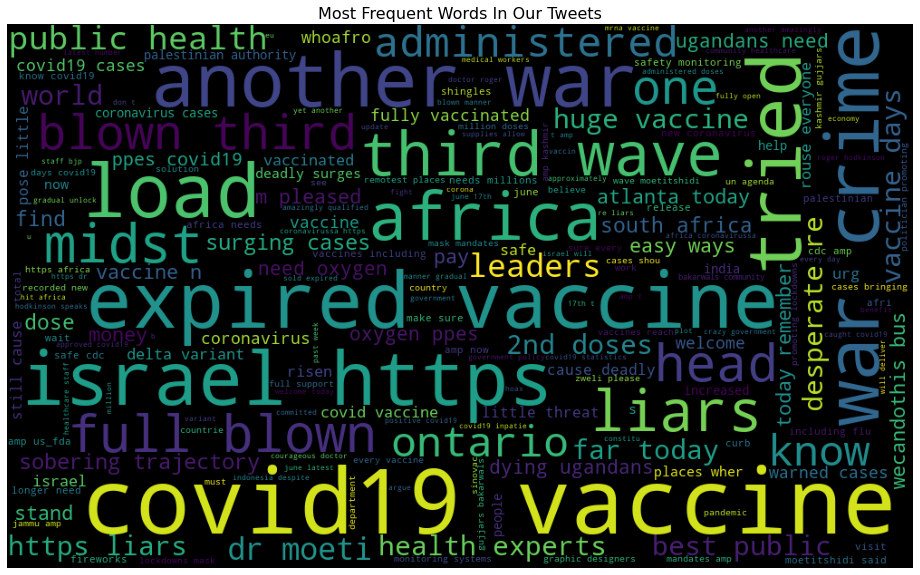

In [96]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize=(20, 10))
plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(data['original_text'].values)))
plt.axis('off')
plt.title('Most Frequent Words In Our Tweets',fontsize=16)
plt.show()

In [97]:
textData=data['original_text']

In [98]:
textData

0        🚨africa is in the midst of a full-blown third...
1        dr moeti is head of who in africa, and one of...
2        i think it’s important that we don’t sell cov...
3        i’m pleased to welcome the wecandothis bus to...
4        yet another amazingly qualified and courageou...
                              ...                        
3187     zweli please just release the graphic designe...
3188     covid19 vaccines reach the remotest places of...
3189     liars. you tried to load off your expired vac...
3190     former pfizer vp and virologist, dr. michael ...
3191     africa needs millions more doses here &amp; n...
Name: original_text, Length: 3192, dtype: object

In [141]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


stop_words=stopwords.words('english')

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
dataWords=list(sent_to_words(textData))

dataWords=remove_stopwords(dataWords)
    



/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [105]:
dataWords[:1][0]

['africa',
 'midst',
 'full',
 'blown',
 'third',
 'wave',
 'coronavirus',
 'head',
 'whoafro',
 'warned',
 'cases',
 'risen']

In [142]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(dataWords)
# Create Corpus
texts = dataWords
# Term Document Frequency
corpuss = [id2word.doc2bow(text) for text in texts]
# View
print(corpuss[:1][0][:30])

dicts=corpora.Dictionary(dataWords)
corpus= [dicts.doc2bow(text) for text in dataWords]

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]


/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1)],
 [(0, 1),
  (5, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1)],
 [(22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1)],
 [(32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1)],
 [(44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1)],
 [(34, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1)],
 [(65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1)],
 [(34, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1)],
 [(0, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78

In [143]:
import pickle
pickle.dump(corpus,open('corpus.pkl','wb'))
dicts.save('dictionary.gensim')

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [144]:
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

lda_model.save('ldamodel.gensim')
topics=lda_model.print_topics()
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]
lda_model.save('model10.gensim')

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, '0.025*"covid" + 0.024*"africa" + 0.023*"third" + 0.023*"wave" + 0.019*"india" + 0.017*"full" + 0.017*"blown" + 0.015*"vaccines" + 0.015*"cases" + 0.015*"midst"'), (1, '0.066*"vaccines" + 0.054*"israel" + 0.052*"expired" + 0.052*"https" + 0.051*"another" + 0.050*"tried" + 0.050*"war" + 0.050*"load" + 0.050*"liars" + 0.050*"crime"'), (2, '0.033*"covid" + 0.022*"vaccines" + 0.018*"africa" + 0.016*"world" + 0.016*"wave" + 0.016*"third" + 0.015*"cases" + 0.015*"amp" + 0.013*"health" + 0.011*"midst"'), (3, '0.065*"covid" + 0.047*"vaccines" + 0.035*"need" + 0.020*"world" + 0.017*"dying" + 0.016*"pay" + 0.016*"ppes" + 0.016*"oxygen" + 0.016*"money" + 0.016*"stand"'), (4, '0.029*"vaccines" + 0.027*"covid" + 0.018*"africa" + 0.017*"coronavirus" + 0.016*"world" + 0.014*"cases" + 0.012*"aipac" + 0.011*"need" + 0.010*"full" + 0.010*"blown"'), (5, '0.048*"vaccines" + 0.034*"covid" + 0.033*"https" + 0.026*"another" + 0.025*"israel" + 0.024*"crime" + 0.024*"liars" + 0.024*"load" + 0.024*"war" + 

In [109]:
!pip install pyLDavis

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     |████████████████████████████████| 15.7 MB 10.2 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.0 which is incompatible.
tensorflow 2.4.1 requires numpy~=1.19.2, but you have numpy 1.21.0 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.4.1 which is incompatible.
matrixprofile 1.1.10 requires protobuf==3.11.2, but you have protobuf 3.15.8 which is incompatible.
autogluon-core 0.1.0 requires numpy==1.19.5, but you have numpy 1.21.0 which is incompatible.


In [145]:
# import pyLDAvis
# import pyLDAvis.gensim_models as gensim
# import pickle 


dictionary = corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model10.gensim')
import pyLDAvis.gensim_models as gensims
lda_display = gensims.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OSError: [Errno 30] Read-only file system: '../input/ldafile/ldavis_prepared_1010'